In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from scipy import stats
!pip install seaborn
import seaborn as sns

In [3]:
BodyBrain_stats = pd.read_csv('~/MSc_Thesis/experiments/BodyBrainQN_stats.csv')
BodyBrain_raw = pd.read_csv('~/MSc_Thesis/experiments/BodyBrainQN.csv')

In [5]:
BodyBrain_stats.head(25)

,Indicator,Best,Worst,Average,STD,Median,Generation,Run,Method
0,morpho_gene_div,3.757496,2.692524,3.350336,0.190786,3.381366,1,1,QN-MOEA
1,morphology,144.000000,6.000000,51.520000,31.571025,49.000000,1,1,QN-MOEA
2,trayectory_x,0.137450,-0.131158,0.005676,0.063775,0.000420,1,1,QN-MOEA
3,aligned_novelty_archive_fit,0.200666,0.002451,0.079157,0.051805,0.071830,1,1,QN-MOEA
4,aligned_novelty_archive_novelty,0.198488,0.031425,0.069949,0.045394,0.046901,1,1,QN-MOEA
5,morpho_div,101.904155,41.121886,55.757314,11.807286,53.109033,1,1,QN-MOEA
6,trayectory_div,0.242069,0.081551,0.118793,0.036135,0.109172,1,1,QN-MOEA
7,endpoint_y,0.314313,-0.056528,0.124375,0.074290,0.122649,1,1,QN-MOEA
8,gene_diversity,5.194370,3.729521,4.296115,0.336501,4.303655,1,1,QN-MOEA
9,aligned_novelty,0.198488,0.031148,0.078918,0.046196,0.066220,1,1,QN-MOEA


In [6]:
BodyBrain_stats.isnull().sum()

Indicator     0
Best          0
Worst         0
Average       0
STD           0
Median        0
Generation    0
Run           0
Method        0
dtype: int64

In [7]:
BodyBrain_raw.head(10)

,morpho_gene_div,trayectory_x,morpho_div,trayectory_div,endpoint_y,gene_diversity,id,md5,aligned_novelty,morphology_active,fitness,endpoint_x,control_gene_div,unaligned_novelty,inipoint_y,morphology_passive,endpoint_div,trayectory_y,inipoint_x
0,3.500954,-0.077116,41.381752,0.149073,0.259500,4.104886,0,938e0d74bb793e614abc786d0fd52694,0.150077,53,0.114938,-0.001388,4.708818,26.988856,0.174272,50,0.201818,0.085228,0.075728
1,3.605537,-0.041611,44.792482,0.098648,0.042451,4.806688,1,03be45554bd1785fbc889e7cd0373994,0.078911,61,0.067358,0.064878,6.007838,27.474106,0.095420,70,0.132220,-0.052968,0.106489
2,3.380806,-0.008349,41.243366,0.112127,0.092848,4.818907,2,56306dd65e00dcf897e7a59a1d107af9,0.033557,36,0.092361,0.124797,6.257007,24.616501,0.184831,53,0.094148,-0.091983,0.133146
3,3.292670,0.037267,69.081429,0.200693,-0.012692,3.895491,3,7cb25e2b9c4bdfb85988eefbddfd9a73,0.113616,12,0.200666,0.162267,4.498311,40.642901,0.184483,104,0.168914,-0.197175,0.125000
4,3.091615,0.063638,50.551606,0.104155,0.157311,3.964550,4,2a25d519c5cafeae8425f5e94d8bd655,0.044747,17,0.074555,0.123253,4.837485,25.404862,0.196154,35,0.097343,-0.038842,0.059615
5,3.470035,-0.005615,48.805830,0.082173,0.086780,3.982417,5,5740de77c8ede319b2709f5146773c6d,0.036236,26,0.006095,0.121744,4.494800,24.034112,0.089151,80,0.096195,-0.002371,0.127358
6,3.542494,-0.000424,58.981658,0.081716,0.047586,4.335481,6,7f6fd4a05c1351228c1ecbf517e4c033,0.060515,10,0.002451,0.131394,5.128468,30.581033,0.050000,23,0.118453,-0.002414,0.131818
7,3.436875,0.056087,51.303084,0.096547,0.125025,4.665378,7,39e7c4fe37906f89fab2d2ea1b1c41ed,0.031542,14,0.056105,0.125498,5.893881,26.468996,0.126471,71,0.090134,-0.001446,0.069412
8,2.692524,-0.043351,44.163434,0.094632,0.126842,3.844487,8,6d4452e3d429301493f87f9932792dee,0.074931,26,0.043390,0.032325,4.996450,24.005708,0.125000,48,0.125249,0.001842,0.075676
9,3.394629,-0.001625,44.316910,0.115881,0.085556,3.973223,9,e1eec4d3518cdd6c27ec7a8fd6164032,0.036628,34,0.097791,0.123375,4.551817,22.325535,0.183333,74,0.096737,-0.097778,0.125000


In [127]:
BodyBrain_raw[BodyBrain_raw['fitness'] <= 0.5]

,morpho_gene_div,control_gene_div,id,trayectory_y,morphology_active,unaligned_novelty,fitness,inipoint_x,md5,aligned_novelty,gene_diversity,endpoint_y,morphology_passive,inipoint_y,trayectory_x,trayectory_div,morpho_div,endpoint_div,endpoint_x
0,3.188407,4.734056,0.000000,-0.112445,109.000000,37.581019,0.311904,0.147656,737e70776aaa435516ac2ee8b962f3a9,0.23381,3.961231,-0.033539,19.000000,0.078906,-0.290930,0.338068,65.385425,0.341527,-0.143274
1,3.322156,4.429673,1.000000,-0.152246,71.000000,24.126000,0.186240,0.115000,71a3efcfbe7fa28b78806d874600bd91,0.185539,3.875915,-0.092246,49.000000,0.060000,0.107268,0.280600,42.329349,0.308060,0.222268
2,2.939143,5.219111,2.000000,-0.066972,64.000000,24.709659,0.139936,0.200000,d2ea087d3089fd54e2c72ca64771872c,0.066397,4.079127,0.058028,44.000000,0.125000,-0.122869,0.218010,41.986533,0.193823,0.077131
5,3.296190,5.461192,5.000000,0.002623,60.000000,25.821882,0.036577,0.133333,1ac9c4ba62424fc6eb99d78e8066948e,0.050747,4.378691,0.129012,48.000000,0.126389,-0.036483,0.188918,42.027162,0.182885,0.096851
6,3.652056,5.039248,6.000000,0.084187,159.000000,72.022687,0.086993,0.125000,1bd7d65bb66b2426e58794d08d774a78,0.08335,4.345652,0.221687,33.000000,0.137500,-0.021916,0.211687,102.325480,0.219782,0.103084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236890,1.558848,44.000000,62.213299,1.562970,-2.356483,0.000000,0.497740,0.477804,0.11828,112d34525fe1a3ab2f4f58831c617db4,148.000000,236890.000000,-0.551441,-2.500032,0.517676,-0.669721,2.588182,29.458877,0.143548
4236891,1.558848,44.000000,62.213299,1.562970,-2.356483,0.000000,0.497740,0.477804,0.11828,112d34525fe1a3ab2f4f58831c617db4,148.000000,236891.000000,-0.551441,-2.500032,0.517676,-0.669721,2.588182,29.458877,0.143548
4236895,1.558848,44.000000,62.213299,1.562970,-2.356483,0.000000,0.497740,0.477804,0.11828,112d34525fe1a3ab2f4f58831c617db4,148.000000,236895.000000,-0.551441,-2.500032,0.517676,-0.669721,2.588182,29.458877,0.143548
4236897,1.558848,44.000000,62.213299,1.562970,-2.356483,0.000000,0.497740,0.477804,0.11828,112d34525fe1a3ab2f4f58831c617db4,148.000000,236897.000000,-0.551441,-2.500032,0.517676,-0.669721,2.588182,29.458877,0.143548


In [128]:
BodyBrain_raw.isnull().sum()

morpho_gene_div       0
control_gene_div      0
id                    0
trayectory_y          0
morphology_active     0
unaligned_novelty     0
fitness               0
inipoint_x            0
md5                   0
aligned_novelty       0
gene_diversity        0
endpoint_y            0
morphology_passive    0
inipoint_y            0
trayectory_x          0
trayectory_div        0
morpho_div            0
endpoint_div          0
endpoint_x            0
dtype: int64

In [8]:
#grouped_by_run = [x for _, x in BodyBrain_raw.groupby(BodyBrain_raw['id']%250000 == 0)]
partitioning_indexes = BodyBrain_raw.index[BodyBrain_raw['id'] % 250000 == 0].tolist()
grouped_by_run = [BodyBrain_raw.iloc[partitioning_indexes[i]:partitioning_indexes[i+1],:] for i in range(len(partitioning_indexes) - 1)]
for run in grouped_by_run:
    partitioning_indexes = run.index[run['id'] % 50 == 0].tolist()

In [9]:
run2 = grouped_by_run[0].copy()
run2.head(10)

IndexError: list index out of range

In [40]:
run2.drop(['md5', 'id'], inplace=True, axis=1)

In [41]:
run2.head(5)

,endpoint_div,trayectory_x,control_gene_div,aligned_novelty,unaligned_novelty,inipoint_x,inipoint_y,endpoint_x,fitness,morphology_passive,morpho_gene_div,gene_diversity,morphology_active,trayectory_div,morpho_div,trayectory_y,endpoint_y
250000,0.356914,-0.056282,4.160593,0.254973,32.283444,0.133333,0.133333,0.077051,0.333631,2.0,3.172299,3.666446,16.0,0.360711,67.480961,-0.328849,-0.195516
250001,0.193686,-0.020030,5.015377,0.082229,48.983295,0.115064,0.147436,0.095034,0.063740,31.0,3.417378,4.216377,125.0,0.173236,81.925075,0.060511,0.207947
250002,0.245262,-0.174498,5.571854,0.150939,46.428489,0.147917,0.116667,-0.026581,0.214301,25.0,3.388309,4.480081,119.0,0.247352,78.509210,-0.124400,-0.007733
250003,0.316501,0.107373,4.963287,0.200330,27.099666,0.24,0.125000,0.347373,0.110067,30.0,3.427582,4.195434,10.0,0.214067,58.665116,0.024204,0.149204
250004,0.154751,-0.070664,5.974107,0.028944,40.223511,0.173611,0.112500,0.102947,0.071698,87.0,3.690546,4.832326,21.0,0.164947,65.546401,0.012130,0.124630


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


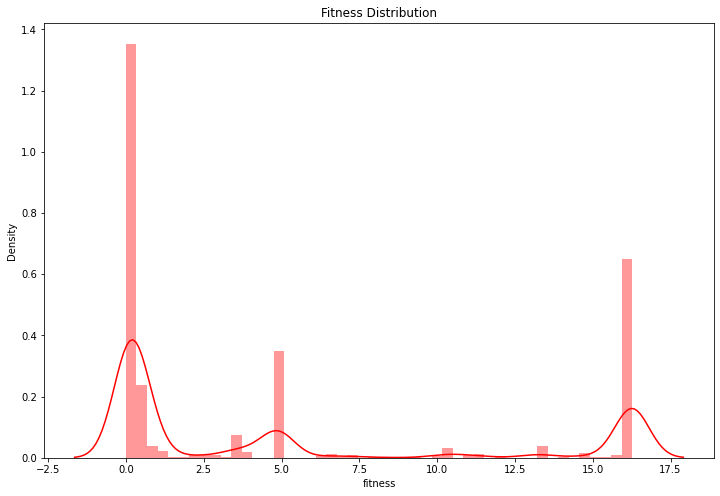

In [47]:
plt.figure(figsize=(12, 8))

sns.distplot(run2['fitness'], 
             color='red')

plt.title('Fitness Distribution')

plt.show()

<Figure size 864x576 with 0 Axes>

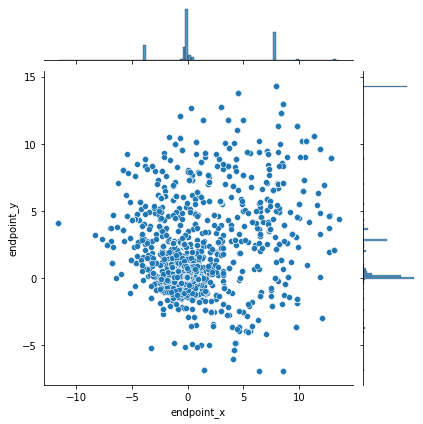

In [48]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2)

plt.show()

<Figure size 864x576 with 0 Axes>

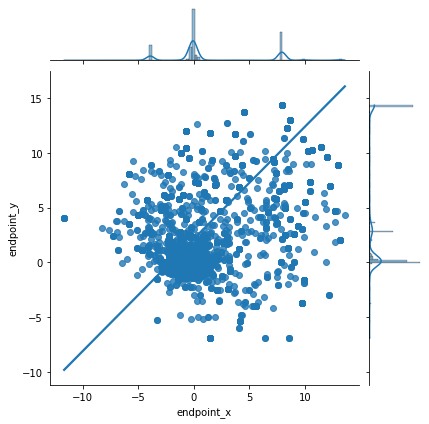

In [49]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='reg')

plt.show()

<Figure size 864x576 with 0 Axes>

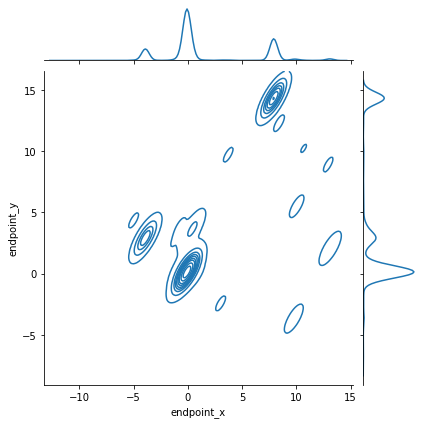

In [50]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='kde')
plt.show()

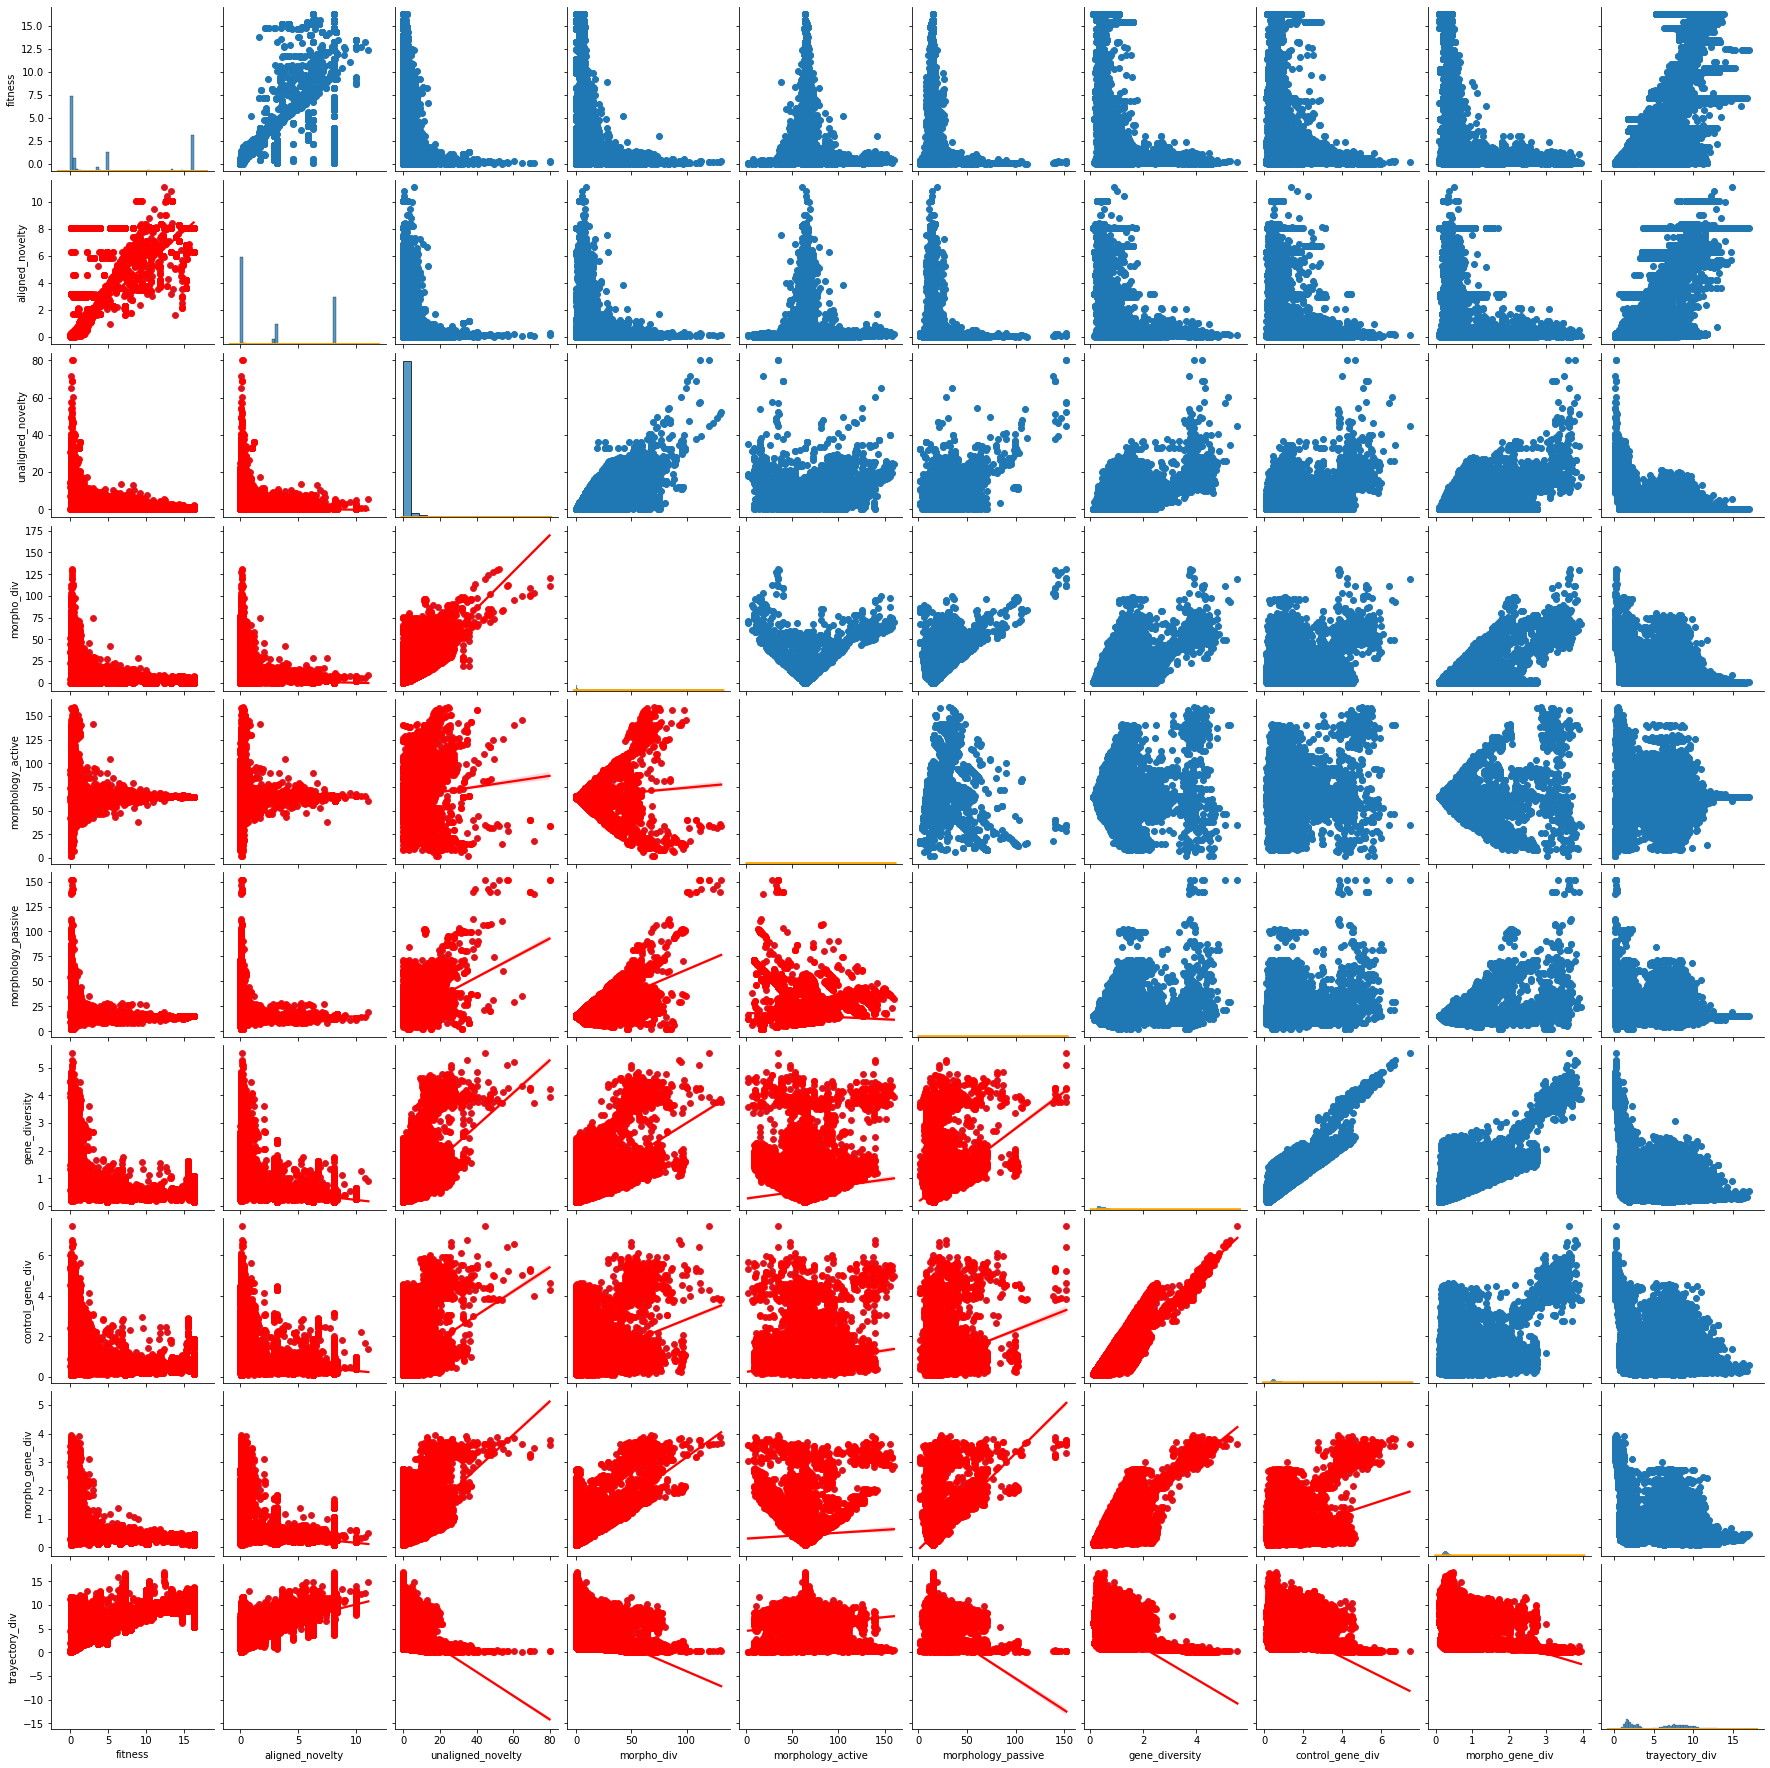

In [51]:
g = sns.pairplot(run2,
        vars=["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"])
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False, color='orange')
g.map_lower(sns.regplot, color='red')
plt.show()

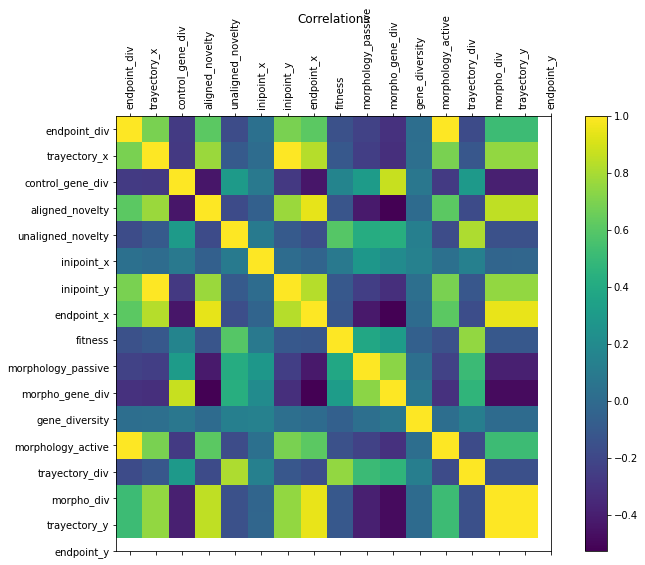

In [52]:
plt.figure(figsize=(12, 8))

plt.matshow(run2.corr(), 
            fignum=False, 
            aspect='equal')

columns = len(run2.columns)

plt.xticks(range(columns), run2.columns)
plt.yticks(range(columns), run2.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

In [53]:
run2[["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"]].corr()

,fitness,aligned_novelty,unaligned_novelty,morpho_div,morphology_active,morphology_passive,gene_diversity,control_gene_div,morpho_gene_div,trayectory_div
fitness,1.000000,0.945159,-0.161640,-0.166187,0.007482,-0.116032,-0.523769,-0.431551,-0.419681,0.613620
aligned_novelty,0.945159,1.000000,-0.176730,-0.178470,0.006591,-0.124939,-0.525956,-0.435604,-0.418333,0.617143
unaligned_novelty,-0.161640,-0.176730,1.000000,0.811203,0.132454,0.599094,0.432530,0.304906,0.417467,-0.168630
morpho_div,-0.166187,-0.178470,0.811203,1.000000,0.126486,0.754174,0.473866,0.293089,0.513776,-0.174811
morphology_active,0.007482,0.006591,0.132454,0.126486,1.000000,-0.057831,0.072682,0.079133,0.031726,0.028289
morphology_passive,-0.116032,-0.124939,0.599094,0.754174,-0.057831,1.000000,0.315203,0.159578,0.390477,-0.146100
gene_diversity,-0.523769,-0.525956,0.432530,0.473866,0.072682,0.315203,1.000000,0.871047,0.736379,-0.305973
control_gene_div,-0.431551,-0.435604,0.304906,0.293089,0.079133,0.159578,0.871047,1.000000,0.309090,-0.268498
morpho_gene_div,-0.419681,-0.418333,0.417467,0.513776,0.031726,0.390477,0.736379,0.309090,1.000000,-0.222583
trayectory_div,0.613620,0.617143,-0.168630,-0.174811,0.028289,-0.146100,-0.305973,-0.268498,-0.222583,1.000000


In [10]:
fitness_stats = BodyBrain_stats[BodyBrain_stats['Indicator'] == 'fitness']
fitness_stats.head(10)

,Indicator,Best,Worst,Average,STD,Median,Generation,Run,Method
12,fitness,0.228208,0.000546,0.082010,0.053700,0.074090,1,1,QN-MOEA
37,fitness,0.552183,0.001750,0.096243,0.086679,0.080388,2,1,QN-MOEA
62,fitness,0.313982,0.005878,0.125646,0.075901,0.115418,3,1,QN-MOEA
87,fitness,0.375741,0.002088,0.144444,0.095840,0.112052,4,1,QN-MOEA
112,fitness,0.837147,0.000415,0.192000,0.159279,0.146958,5,1,QN-MOEA
137,fitness,0.837147,0.001750,0.197867,0.154513,0.150147,6,1,QN-MOEA
162,fitness,0.837147,0.005181,0.199625,0.152834,0.166101,7,1,QN-MOEA
187,fitness,0.865499,0.010610,0.254260,0.189614,0.213956,8,1,QN-MOEA
212,fitness,0.837147,0.008198,0.213232,0.189404,0.159532,9,1,QN-MOEA
237,fitness,1.803629,0.013504,0.313138,0.285133,0.224425,10,1,QN-MOEA


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


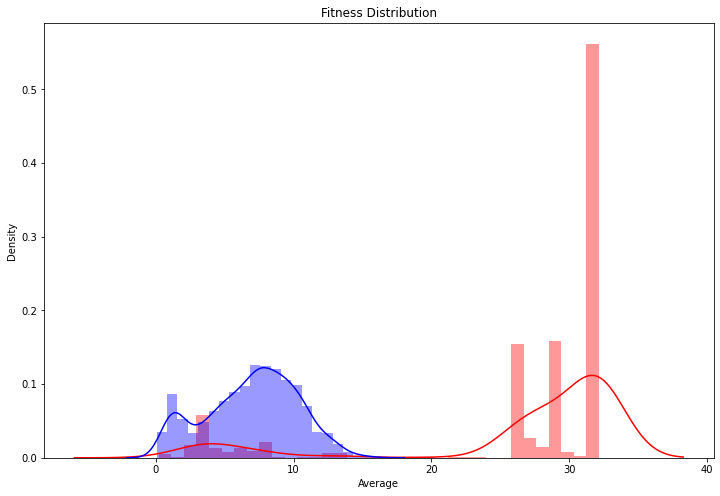

In [11]:
run1 = fitness_stats[fitness_stats['Run'] == 1]

plt.figure(figsize=(12, 8))

sns.distplot(run1['Best'], 
             color='red')

sns.distplot(run1['Average'], 
             color='blue')

plt.title('Fitness Distribution')

plt.show()

Text(0.5, 1.0, 'Generation')

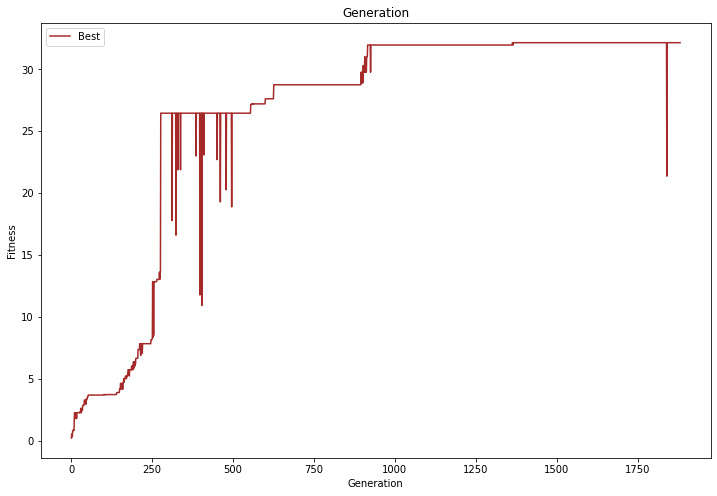

In [17]:
run1.plot(x='Generation', y='Best', 
                    figsize=(12, 8), color='brown')

plt.ylabel('Fitness')
plt.title('Generation')

In [52]:


def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.median(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)



In [114]:
fitness_max_mat = []
fitness_median_mat = []
fitness_mean_mat = []
for i in range(19):
    run_i = fitness_stats[fitness_stats['Run'] == i + 1][:5000]
    fitness_max_mat += [run_i['Best'].tolist()]
    #fitness_median_mat += [run_i['Median'].tolist()]
    fitness_mean_mat += [run_i['Average'].tolist()]
    


In [115]:
fitness_max_mat = np.array(fitness_max_mat)
fitness_median_mat = np.array(fitness_median_mat)
fitness_mean_mat = np.array(fitness_mean_mat)

In [116]:
fitness_max_mat.shape

(19, 5000)

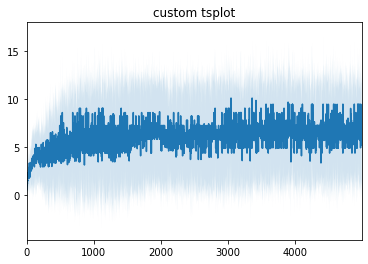

In [117]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

tsplot(ax2, fitness_max_mat)

ax2.set_title("custom tsplot")

plt.show()

In [120]:



def bootstrap(data, n_boot=10000, ci=68):
    boot_dist = []
    for i in range(int(n_boot)):
        resampler = np.random.randint(0, data.shape[0], data.shape[0])
        sample = data.take(resampler, axis=0)
        boot_dist.append(np.mean(sample, axis=0))
    b = np.array(boot_dist)
    s1 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.-ci/2.)
    s2 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.+ci/2.)
    return (s1,s2)
    
def tsplotboot(ax, data,ci = 68, **kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    cis = bootstrap(data, ci = ci)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

Text(0.5, 1.0, 'custom tsplot bootstrapped')

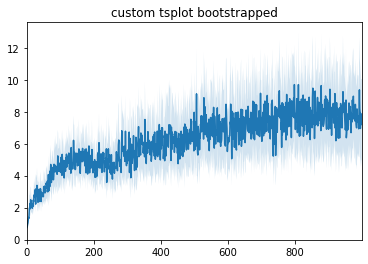

In [133]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

#tsplot(ax, fitness_max_mat)
tsplotboot(ax2, fitness_max_mat[:, :1000], ci=95)
#ax.set_title("custom tsplot")
ax2.set_title("custom tsplot bootstrapped")

In [3]:
pareto_plot = np.array([[-1.81857872e-01, -5.44203700e+01],
       [-1.09865479e-01, -3.76353661e+01],
       [-6.86816755e-02, -4.32262828e+01],
       [-7.56706319e-02, -3.83155649e+01],
       [-2.40783407e-03, -4.97955685e+01],
       [-9.42919415e-02, -2.88027141e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.84176045e-03, -3.28258762e+01],
       [-4.35436653e-02, -2.97728957e+01],
       [-1.56684493e-01, -3.33987600e+01],
       [-4.41154936e-02, -5.87815413e+01],
       [-1.26900164e-01, -5.24887079e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-8.14415198e-03, -3.35656170e+01],
       [-1.11555243e-01, -3.93111248e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.73227366e-02, -4.20198469e+01],
       [-1.86508003e-01, -6.88610416e+01],
       [-1.05595129e-01, -6.59654790e+01]])

In [5]:
ids = np.array([3, 0, 1, 4, 6, 2, 9, 7, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.int64)
[3, 0, 1, 4, 6, 9, 7, 2, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [6]:
pareto_plot = np.column_stack((ids, pareto_plot))

In [7]:
pareto_plot = pd.DataFrame(pareto_plot, columns = ['id', 'fitness', 'novelty'])

In [8]:
pareto_plot

,id,fitness,novelty
0,3.0,-0.181858,-54.420370
1,0.0,-0.109865,-37.635366
2,1.0,-0.068682,-43.226283
3,4.0,-0.075671,-38.315565
4,6.0,-0.002408,-49.795569
5,2.0,-0.094292,-28.802714
6,9.0,-0.087546,-30.281998
7,7.0,-0.050412,-33.138683
8,5.0,-0.007842,-32.825876
9,8.0,-0.043544,-29.772896


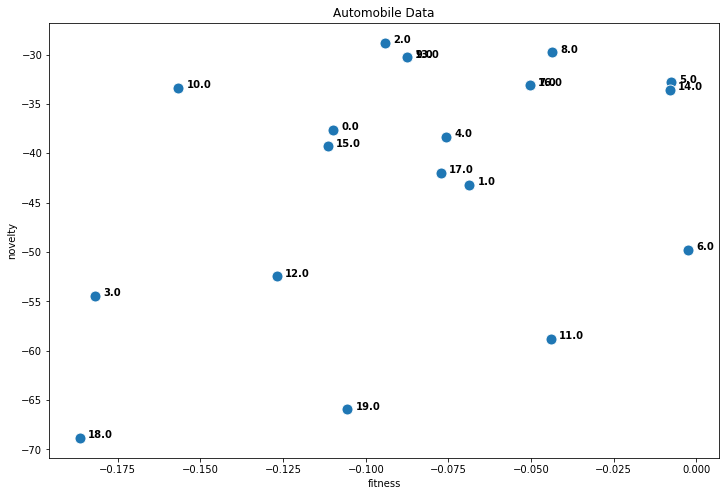

In [9]:
plt.figure(figsize=(12, 8))

p1 = sns.scatterplot(x='fitness', y='novelty', 
                data=pareto_plot, s=120)

for line in range(0,pareto_plot.shape[0]):
     p1.text(pareto_plot.fitness[line]+0.0025, pareto_plot.novelty[line], 
     pareto_plot.id[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.title('Automobile Data')

plt.show()

In [12]:
survivors = pareto_plot.iloc[[18, 0, 19, 10, 12, 11, 2, 15, 17, 4], :]
survivors

,id,fitness,novelty
18,18.0,-0.186508,-68.861042
0,3.0,-0.181858,-54.420370
19,19.0,-0.105595,-65.965479
10,10.0,-0.156684,-33.398760
12,12.0,-0.126900,-52.488708
11,11.0,-0.044115,-58.781541
2,1.0,-0.068682,-43.226283
15,15.0,-0.111555,-39.311125
17,17.0,-0.077323,-42.019847
4,6.0,-0.002408,-49.795569


In [13]:
tournament_indexes = np.array([[6, 5],
       [0, 4],
       [9, 3],
       [8, 2],
       [1, 7],
       [3, 6],
       [7, 5],
       [2, 8],
       [9, 4],
       [1, 0]])

In [16]:
tournament_winners = np.array([5., 0., 9., 2., 1., 3., 5., 2., 4., 0.])

In [17]:
survivors.iloc[tournament_winners, :]

,id,fitness,novelty
11,11.0,-0.044115,-58.781541
18,18.0,-0.186508,-68.861042
4,6.0,-0.002408,-49.795569
19,19.0,-0.105595,-65.965479
0,3.0,-0.181858,-54.420370
10,10.0,-0.156684,-33.398760
11,11.0,-0.044115,-58.781541
19,19.0,-0.105595,-65.965479
12,12.0,-0.126900,-52.488708
18,18.0,-0.186508,-68.861042


In [ ]:
[array([ -0.19000361, -46.33960885]), 
 array([ -0.08229078, -53.23336948]), 
 array([ -0.18730336, -42.0751516 ]), 
 array([ -0.18300995, -46.33960885]), 
 array([-1.29223909e-02, -5.18158565e+01]), 
 array([ -0.17188319, -46.33960885]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.1624015 , -38.02066754]), 
 array([ -0.14479606, -49.13475351]), 
 array([ -0.18099036, -47.61097185]), 
 array([ -0.16056119, -49.13475351]), 
 array([-1.46980045e-03, -5.80607919e+01]), 
 array([ -0.06838493, -67.38136963]), 
 array([ -0.07364034, -51.48698217]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.13552332, -43.60922584]), 
 array([ -0.14049073, -49.13475351]), 
 array([ -0.07647704, -53.51893148])]

In [1]:
[[0.1745799536087905, 54.42037004045381, 0.1290030682916371], [0.10609326883729446, 37.63536606148458, 0.20074988593763374], [0.0796577620325119, 43.226282773327924, 0.11434455465100764], [0.001886117759640692, 49.79556848063127, 0.09085349299056196], [0.09626681129774153, 30.281998259256277, 0.07137179747072088], [0.07436383382880075, 38.315564943463116, 0.0957906055212885], [0.07972661529975145, 28.802714126970297, 0.07188431771291624], [0.054134798284911544, 33.13868351127313, 0.07824960991358688], [0.008206027818623974, 32.82587619434412, 0.07151423339485782], [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

[[0.1745799536087905, 54.42037004045381, 0.1290030682916371],
 [0.10609326883729446, 37.63536606148458, 0.20074988593763374],
 [0.0796577620325119, 43.226282773327924, 0.11434455465100764],
 [0.001886117759640692, 49.79556848063127, 0.09085349299056196],
 [0.09626681129774153, 30.281998259256277, 0.07137179747072088],
 [0.07436383382880075, 38.315564943463116, 0.0957906055212885],
 [0.07972661529975145, 28.802714126970297, 0.07188431771291624],
 [0.054134798284911544, 33.13868351127313, 0.07824960991358688],
 [0.008206027818623974, 32.82587619434412, 0.07151423339485782],
 [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

In [2]:
[[0.1745799536087905, 38.422598964092586, 0.1015109247879249], [0.10609326883729446, 27.44048759983132, 0.16508518277566595], [0.0796577620325119, 30.3297765312161, 0.09300718489977867], [0.001886117759640692, 38.53554647545725, 0.07216547467624573], [0.09626681129774153, 19.425894753866817, 0.057052528022613694], [0.07436383382880075, 27.316762654613107, 0.08337605965697106], [0.07972661529975145, 19.71638870642372, 0.058746200822718794], [0.054134798284911544, 23.313816981475405, 0.06619935706110809], [0.008206027818623974, 21.119866034703364, 0.0571601274708769], [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

[[0.1745799536087905, 38.422598964092586, 0.1015109247879249],
 [0.10609326883729446, 27.44048759983132, 0.16508518277566595],
 [0.0796577620325119, 30.3297765312161, 0.09300718489977867],
 [0.001886117759640692, 38.53554647545725, 0.07216547467624573],
 [0.09626681129774153, 19.425894753866817, 0.057052528022613694],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106],
 [0.07972661529975145, 19.71638870642372, 0.058746200822718794],
 [0.054134798284911544, 23.313816981475405, 0.06619935706110809],
 [0.008206027818623974, 21.119866034703364, 0.0571601274708769],
 [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

In [3]:
[[0.18106390712030845, 38.422598964092586, 0.11167156463953791], [0.06557151817724394, 19.425894753866817, 0.06380974949081243], [0.12760615365963185, 21.588165482134986, 0.0822409969652915], [0.05415832740129964, 20.20609320634022, 0.09870898402233927], [0.007357861276525066, 21.119866034703364, 0.05711189068701966], [0.1112125401388089, 29.557427996172596, 0.1704897453225194], [0.09665016161184178, 19.71638870642372, 0.056966782203714636], [0.08210770100005006, 30.3297765312161, 0.0949991653904494], [0.044335347456731504, 22.167387244957084, 0.09252863727439026], [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]

[[0.18106390712030845, 38.422598964092586, 0.11167156463953791],
 [0.06557151817724394, 19.425894753866817, 0.06380974949081243],
 [0.12760615365963185, 21.588165482134986, 0.0822409969652915],
 [0.05415832740129964, 20.20609320634022, 0.09870898402233927],
 [0.007357861276525066, 21.119866034703364, 0.05711189068701966],
 [0.1112125401388089, 29.557427996172596, 0.1704897453225194],
 [0.09665016161184178, 19.71638870642372, 0.056966782203714636],
 [0.08210770100005006, 30.3297765312161, 0.0949991653904494],
 [0.044335347456731504, 22.167387244957084, 0.09252863727439026],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]